In [1]:
!pip install researchpy

                                              0.0/9.2 MB ? eta -:--:--
     -----                                    1.3/9.2 MB 26.8 MB/s eta 0:00:01
     --------------                           3.4/9.2 MB 44.0 MB/s eta 0:00:01
     -----------------------                  5.4/9.2 MB 43.4 MB/s eta 0:00:01
     ---------------------------------        7.7/9.2 MB 44.9 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 49.2 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 36.8 MB/s eta 0:00:00
                                              0.0/233.8 kB ? eta -:--:--
     ------------------------------------- 233.8/233.8 kB 14.9 MB/s eta 0:00:00


In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [3]:
bike_sharing_data = pd.read_csv('day.csv')
bike_sharing_data.shape

(731, 16)

In [5]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_sharing_data = bike_sharing_data[['season',
                                      'mnth',
                                      'holiday',
                                      'workingday',
                                      'weathersit',
                                      'temp',
                                      'cnt']]

In [7]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [10]:
bike_sharing_data.to_csv('bike_sharing_data_processed.csv', index=False)

In [11]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [13]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<Axes: title={'center': 'cnt'}, xlabel='workingday'>

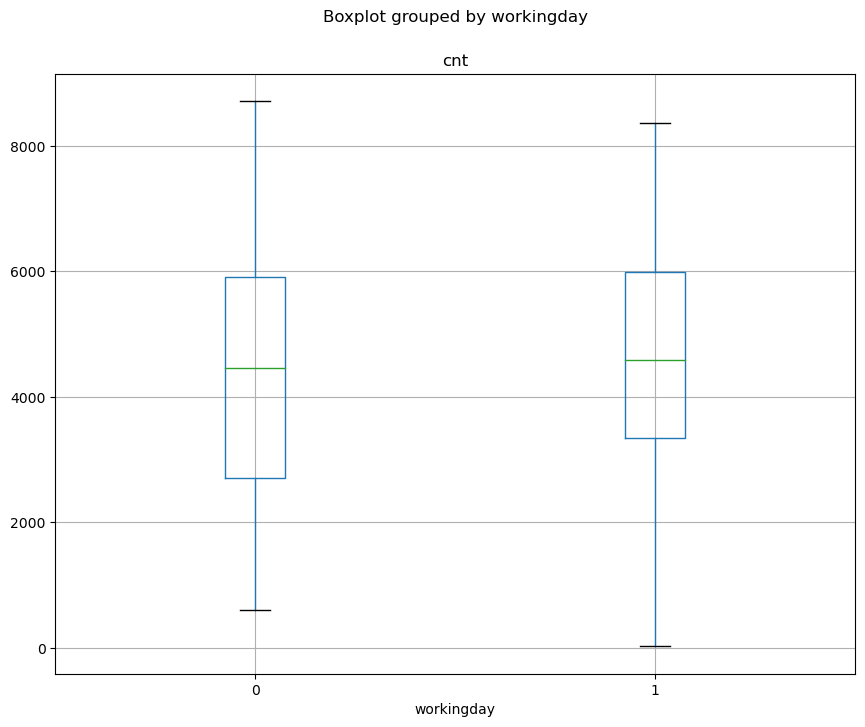

In [15]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(10, 8))

In [18]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]
sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [19]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [20]:
sample_01 = sample_01.sample(231)
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

In [21]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.062599012836073, pvalue=0.04442399738135315)

(array([ 7., 15., 22., 42., 35., 36., 32., 21., 16.,  5.]),
 array([-2.29301593, -1.82537734, -1.35773876, -0.89010017, -0.42246158,
         0.04517701,  0.51281559,  0.98045418,  1.44809277,  1.91573136,
         2.38336994]),
 <BarContainer object of 10 artists>)

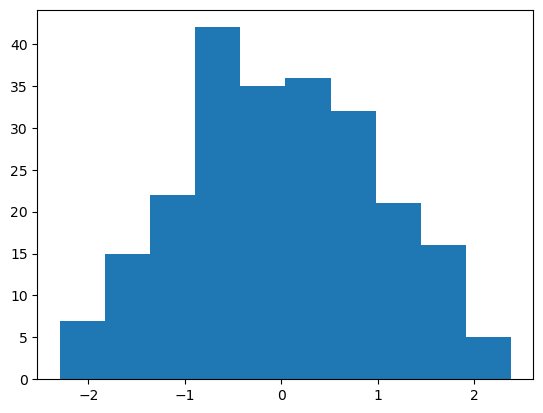

In [23]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=float))

plt.hist(diff)

In [25]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.8810750511233219, pvalue=0.06059307843406558)

In [26]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

C:\Users\willj\anaconda3\envs\Python310\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [27]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4671.805195,1846.142354,121.467249,4432.474414,4911.135975
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4500.987013,1957.227800,91.058478,4322.045883,4679.928142


In [28]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   341.6364
1      Degrees of freedom =   460.0000
2                       t =     1.8811
3   Two side test p value =     0.0606
4  Difference < 0 p value =     0.9697
5  Difference > 0 p value =     0.0303
6               Cohen's d =     0.1750
7               Hedge's g =     0.1747
8          Glass's delta1 =     0.1851
9        Point-Biserial r =     0.0874
